<a href="https://colab.research.google.com/github/aditeyabaral/kepler-exoplanet-analysis/blob/master/src/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint

# Initialising libraires

In [2]:
pp = pprint.PrettyPrinter(indent = 3)

# Loading DataFrame

[Dataset URL](https://www.kaggle.com/nasa/kepler-exoplanet-search-results)<br>
[Link to Metadata](https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html)<br>
[Column Name Metadata](https://exoplanetarchive.ipac.caltech.edu/docs/API_keplerstellar_columns.html)

In [3]:
df = pd.read_csv("../data/kepler-data.csv")
print(df.shape)
df.head()

(9564, 50)


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


# Counting NaN Values

In [4]:
nan_columns = df.isnull().sum()
nan_columns = {col:count for col, count in nan_columns.items() if count >0}

In [5]:
pp.pprint(nan_columns)

{  'kepler_name': 7270,
   'koi_depth': 363,
   'koi_depth_err1': 454,
   'koi_depth_err2': 454,
   'koi_duration_err1': 454,
   'koi_duration_err2': 454,
   'koi_impact': 363,
   'koi_impact_err1': 454,
   'koi_impact_err2': 454,
   'koi_insol': 321,
   'koi_insol_err1': 321,
   'koi_insol_err2': 321,
   'koi_kepmag': 1,
   'koi_model_snr': 363,
   'koi_period_err1': 454,
   'koi_period_err2': 454,
   'koi_prad': 363,
   'koi_prad_err1': 363,
   'koi_prad_err2': 363,
   'koi_score': 1510,
   'koi_slogg': 363,
   'koi_slogg_err1': 468,
   'koi_slogg_err2': 468,
   'koi_srad': 363,
   'koi_srad_err1': 468,
   'koi_srad_err2': 468,
   'koi_steff': 363,
   'koi_steff_err1': 468,
   'koi_steff_err2': 483,
   'koi_tce_delivname': 346,
   'koi_tce_plnt_num': 346,
   'koi_teq': 363,
   'koi_teq_err1': 9564,
   'koi_teq_err2': 9564,
   'koi_time0bk_err1': 454,
   'koi_time0bk_err2': 454}


## Preliminary Cleaning

### Removing Mostly NaN Columns

We notice that **all the values** in 2 columns are NaN:
* `koi_teq_err1`
* `koi_teq_err2`

These columns are the associated errors in estimating the equilibrium temperatures of a exoplanet, and are approximated quantities. Since we cannot estimate their values, we can drop them.

In [6]:
df.drop(columns = ["koi_teq_err1", "koi_teq_err2"], inplace = True)

Since `kepler_name` is mostly NaN and is a non-essential attriubute, we can drop it.

In [7]:
df.drop(columns = ["kepler_name"], inplace = True)

### Removing Mostly NaN Rows

A threshold is set such that rows in which atleast **20%** of the fields are NaN are dropped.

In [8]:
df = df[~(df.isnull().sum(axis=1) > int((0.2)*df.shape[1]))]

## Shape after Preliminary Cleaning

In [9]:
print(df.shape)

(9110, 47)


We observe that:
* The number of rows has decreased from 9564 to 9110
* The number of columns has descreased from 50 to 47

# Replacing NaN Values

There are two broad types of NaN values present.
* NaN in Error Values - These include the positive and negative error in estimating attributes
* NaN in Measurable Attributes - These include missing values in measuring attributes 

## Replacing NaN in Error Values

### Finding Error Attributes with NaN

In [10]:
missing_error_attribute_names = [attr for attr in df.columns if "err" in attr]
pp.pprint(missing_error_attribute_names)

[  'koi_period_err1',
   'koi_period_err2',
   'koi_time0bk_err1',
   'koi_time0bk_err2',
   'koi_impact_err1',
   'koi_impact_err2',
   'koi_duration_err1',
   'koi_duration_err2',
   'koi_depth_err1',
   'koi_depth_err2',
   'koi_prad_err1',
   'koi_prad_err2',
   'koi_insol_err1',
   'koi_insol_err2',
   'koi_steff_err1',
   'koi_steff_err2',
   'koi_slogg_err1',
   'koi_slogg_err2',
   'koi_srad_err1',
   'koi_srad_err2']


Since these are positive and negative error measures for the corresponding attributes, we can do either of the following 
* Replace with the mean or median of the attribute errors
* Drop the rows
* Replace with a default value = 0
* Take a look at the percentage error between the column and its associated error

We cannot use regression based techniques to estimate the error since 
* A greater set of values does not mean a greater error
* The errors consist of errors while estimating a value and do not depend on any of the attributes

### Finding Distributions of Error Attributes

Let us first extract a slice of the dataset that contains the error attributes

In [11]:
missing_error_values_df = df[missing_error_attribute_names].copy()
print(missing_error_values_df.shape)
missing_error_values_df.head()

(9110, 20)


,koi_period_err1,koi_period_err2,koi_time0bk_err1,koi_time0bk_err2,koi_impact_err1,koi_impact_err2,koi_duration_err1,koi_duration_err2,koi_depth_err1,koi_depth_err2,koi_prad_err1,koi_prad_err2,koi_insol_err1,koi_insol_err2,koi_steff_err1,koi_steff_err2,koi_slogg_err1,koi_slogg_err2,koi_srad_err1,koi_srad_err2
0,2.775000e-05,-2.775000e-05,0.002160,-0.002160,0.318,-0.146,0.08190,-0.08190,19.5,-19.5,0.26,-0.15,29.45,-16.65,81.0,-81.0,0.064,-0.096,0.105,-0.061
1,2.479000e-04,-2.479000e-04,0.003520,-0.003520,0.059,-0.443,0.11600,-0.11600,35.5,-35.5,0.32,-0.19,2.87,-1.62,81.0,-81.0,0.064,-0.096,0.105,-0.061
2,1.494000e-05,-1.494000e-05,0.000581,-0.000581,5.126,-0.077,0.03410,-0.03410,171.0,-171.0,3.92,-1.31,31.04,-10.49,158.0,-176.0,0.044,-0.176,0.233,-0.078
3,2.630000e-07,-2.630000e-07,0.000115,-0.000115,0.115,-0.092,0.00537,-0.00537,12.8,-12.8,8.50,-2.83,668.95,-230.35,157.0,-174.0,0.053,-0.168,0.201,-0.067
4,3.761000e-06,-3.761000e-06,0.001130,-0.001130,0.235,-0.478,0.04200,-0.04200,16.9,-16.9,0.88,-0.35,874.33,-314.24,169.0,-211.0,0.070,-0.210,0.334,-0.133


We can now find the mean and median of the remaining columns

In [12]:
error_attribute_means = np.nanmean(missing_error_values_df.values, axis=0)
error_attribute_means

array([ 2.14786371e-03, -2.14786371e-03,  9.93256054e-03, -9.93256054e-03,
        1.95986060e+00, -3.32557464e-01,  3.39941514e-01, -3.39941514e-01,
        1.23197563e+02, -1.23197563e+02,  1.76765763e+01, -3.31968968e+01,
        3.48311214e+03, -3.77164692e+03,  1.44517597e+02, -1.62054604e+02,
        1.20314977e-01, -1.43213390e-01,  3.58282447e-01, -3.78140446e-01])

In [13]:
error_attribute_medians = np.nanmedian(missing_error_values_df.values, axis=0)
error_attribute_medians

array([ 3.5205e-05, -3.5205e-05,  4.1300e-03, -4.1300e-03,  1.9300e-01,
       -2.0700e-01,  1.4200e-01, -1.4200e-01,  2.0750e+01, -2.0750e+01,
        5.2000e-01, -3.0000e-01,  7.1715e+01, -3.9465e+01,  1.5700e+02,
       -1.6000e+02,  7.0000e-02, -1.2800e-01,  2.5000e-01, -1.1100e-01])

There seems to be some difference in the median and mean values, suggesting skewed data for attributes.<br>
We might need to plot each and decide when we can take the mean or the median.

## Replacing NaN in Orbital Period

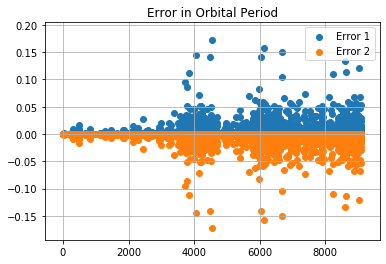

In [14]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_period_err1"].values, label = "Error 1")
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_period_err2"].values, label = "Error 2")
plt.title("Error in Orbital Period")
plt.grid()
plt.legend()

### Viewing Frequency Distribution

#### Positive Error

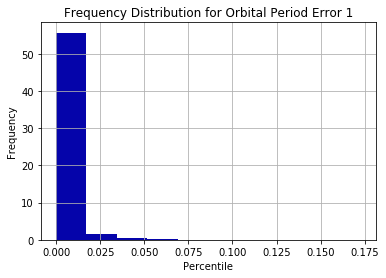

In [15]:
plt.hist(missing_error_values_df["koi_period_err1"].values, color = "#0504aa", density=True)
plt.title("Frequency Distribution for Orbital Period Error 1")
plt.xlabel("Percentile")
plt.ylabel("Frequency")
plt.grid()

In [16]:
df["koi_period_err1"].fillna(np.nanpercentile(missing_error_values_df["koi_period_err1"].values, 50), inplace = True)

#### Negative Error

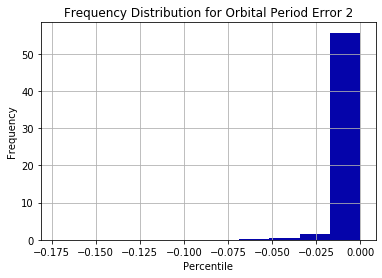

In [17]:
plt.hist(missing_error_values_df["koi_period_err2"].values, color="#0504aa", density = True)
plt.title("Frequency Distribution for Orbital Period Error 2")
plt.xlabel("Percentile")
plt.ylabel("Frequency")
plt.grid()

In [18]:
df["koi_period_err2"].fillna(np.nanpercentile(missing_error_values_df["koi_period_err2"].values, 50), inplace = True)

## Replacing NaN in Transit Epoch

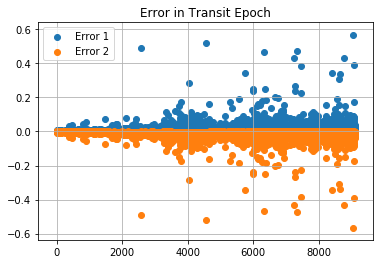

In [19]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_time0bk_err1"].values, label = "Error 1")
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_time0bk_err2"].values, label = "Error 2")
plt.title("Error in Transit Epoch")
plt.legend()
plt.grid()

### Viewing Frequency Distribution

#### Positive Error

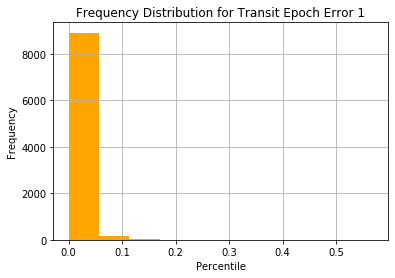

In [20]:
plt.hist(missing_error_values_df["koi_time0bk_err1"].values, color="orange")
plt.title("Frequency Distribution for Transit Epoch Error 1")
plt.xlabel("Percentile")
plt.ylabel("Frequency")
plt.grid()

In [21]:
df["koi_time0bk_err1"].fillna(np.nanpercentile(missing_error_values_df["koi_time0bk_err1"].values, 50), inplace = True)

#### Negative Error

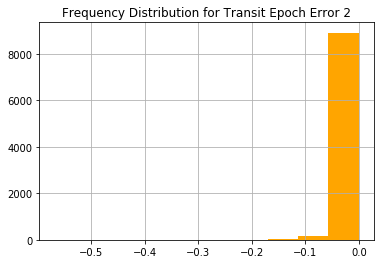

In [22]:
plt.hist(missing_error_values_df["koi_time0bk_err2"].values, color="orange")
plt.title("Frequency Distribution for Transit Epoch Error 2")
plt.grid()

In [23]:
df["koi_time0bk_err2"].fillna(np.nanpercentile(missing_error_values_df["koi_time0bk_err2"].values, 50), inplace = True)

## Replacing NaN in Impact Parameter

### Viewing Frequency Distribution

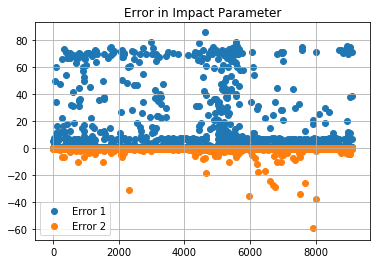

In [24]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_impact_err1"].values, label = "Error 1")
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_impact_err2"].values, label = "Error 2")
plt.title("Error in Impact Parameter")
plt.legend()
plt.grid()

#### Positive Error

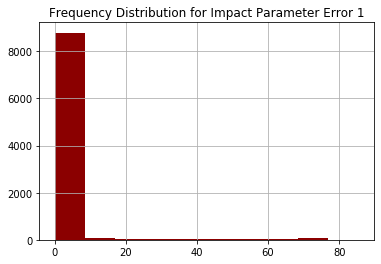

In [25]:
plt.hist(missing_error_values_df["koi_impact_err1"].values, color="darkred")
plt.title("Frequency Distribution for Impact Parameter Error 1")
plt.grid()

In [26]:
df["koi_impact_err1"].fillna(np.nanpercentile(missing_error_values_df["koi_impact_err1"].values, 50), inplace = True)

#### Negative Error

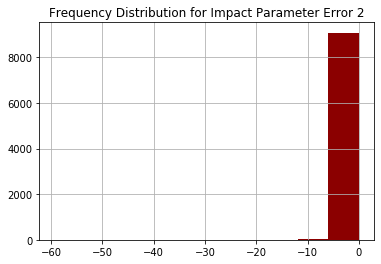

In [27]:
plt.hist(missing_error_values_df["koi_impact_err2"].values, color="darkred")
plt.title("Frequency Distribution for Impact Parameter Error 2")
plt.grid()

In [28]:
df["koi_impact_err2"].fillna(np.nanpercentile(missing_error_values_df["koi_impact_err2"].values, 50), inplace = True)

## Replacing NaN in Transit Duration

### Viewing Frequency Distribution

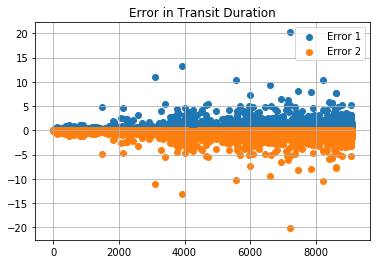

In [29]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_duration_err1"].values, label = "Error 1")
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_duration_err2"].values, label = "Error 2")
plt.title("Error in Transit Duration")
plt.legend()
plt.grid()

#### Positive Error

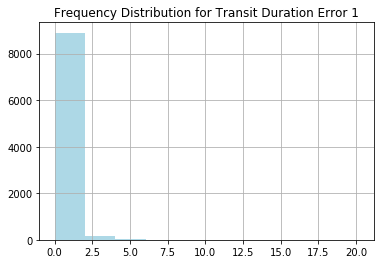

In [30]:
plt.hist(missing_error_values_df["koi_duration_err1"].values, color="lightblue")
plt.title("Frequency Distribution for Transit Duration Error 1")
plt.grid()

In [31]:
df["koi_duration_err1"].fillna(np.nanpercentile(missing_error_values_df["koi_duration_err1"].values, 50), inplace = True)

#### Negative Error

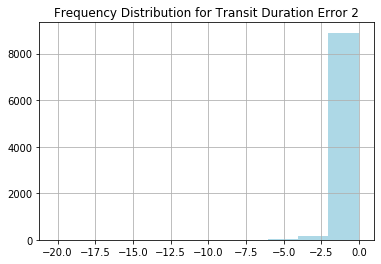

In [32]:
plt.hist(missing_error_values_df["koi_duration_err2"].values, color="lightblue")
plt.title("Frequency Distribution for Transit Duration Error 2")
plt.grid()

In [33]:
df["koi_duration_err2"].fillna(np.nanpercentile(missing_error_values_df["koi_duration_err2"].values, 50), inplace = True)

## Replacing NaN in Transit Depth

### Viewing Frequency Distribution

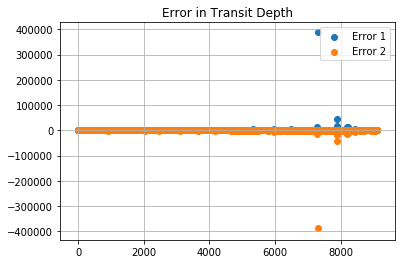

In [34]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_depth_err1"].values, label = "Error 1")
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_depth_err2"].values, label = "Error 2")
plt.title("Error in Transit Depth")
plt.legend()
plt.grid()

#### Positive Error

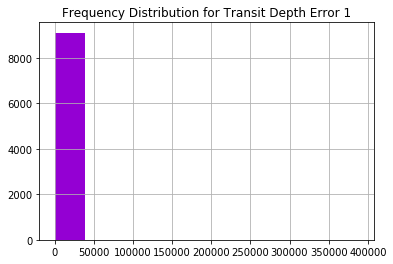

In [35]:
plt.hist(missing_error_values_df["koi_depth_err1"].values, color="darkviolet")
plt.title("Frequency Distribution for Transit Depth Error 1")
plt.grid()

In [36]:
df["koi_depth_err1"].fillna(np.nanpercentile(missing_error_values_df["koi_depth_err1"].values, 50), inplace = True)

#### Negative Error

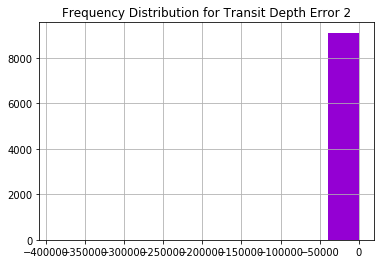

In [37]:
plt.hist(missing_error_values_df["koi_depth_err2"].values, color="darkviolet")
plt.title("Frequency Distribution for Transit Depth Error 2")
plt.grid()

In [38]:
df["koi_depth_err2"].fillna(np.nanpercentile(missing_error_values_df["koi_depth_err2"].values, 50), inplace = True)

## Replacing NaN in Planet Radius

### Viewing Frequency Distribution

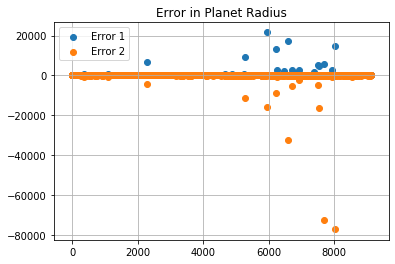

In [39]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_prad_err1"].values, label = "Error 1")
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_prad_err2"].values, label = "Error 2")
plt.title("Error in Planet Radius")
plt.legend()
plt.grid()

#### Positive Error

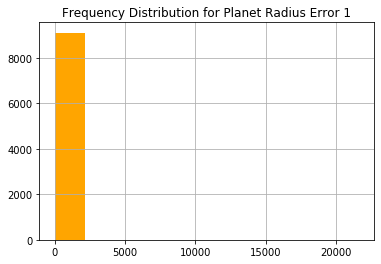

In [40]:
plt.hist(missing_error_values_df["koi_prad_err1"].values, color="orange")
plt.title("Frequency Distribution for Planet Radius Error 1")
plt.grid()

In [41]:
df["koi_prad_err1"].fillna(np.nanpercentile(missing_error_values_df["koi_prad_err1"].values, 50), inplace = True)

#### Negative Error

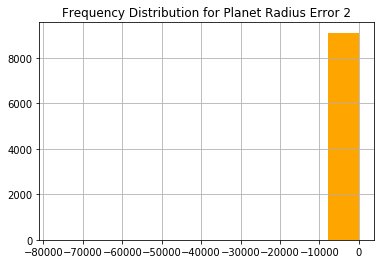

In [42]:
plt.hist(missing_error_values_df["koi_prad_err2"].values, color="orange")
plt.title("Frequency Distribution for Planet Radius Error 2")
plt.grid()

In [43]:
df["koi_prad_err2"].fillna(np.nanpercentile(missing_error_values_df["koi_prad_err2"].values, 50), inplace = True)

## Replacing NaN in  Insolation Flux

### Viewing Frequency Distribution

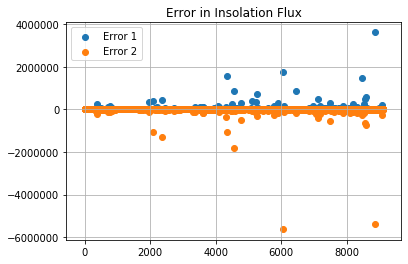

In [44]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_insol_err1"].values, label = "Error 1")
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_insol_err2"].values, label = "Error 2")
plt.title("Error in Insolation Flux")
plt.legend()
plt.grid()

#### Positive Error

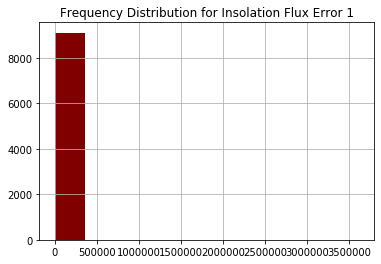

In [45]:
plt.hist(missing_error_values_df["koi_insol_err1"].values, color="maroon")
plt.title("Frequency Distribution for Insolation Flux Error 1")
plt.grid()

In [46]:
df["koi_insol_err1"].fillna(np.nanpercentile(missing_error_values_df["koi_insol_err1"].values, 50), inplace = True)

#### Negative Error

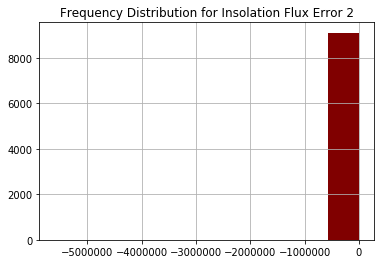

In [47]:
plt.hist(missing_error_values_df["koi_insol_err2"].values, color="maroon")
plt.title("Frequency Distribution for Insolation Flux Error 2")
plt.grid()

In [48]:
df["koi_insol_err2"].fillna(np.nanpercentile(missing_error_values_df["koi_insol_err2"].values, 50), inplace = True)

## Replacing NaN in Stellar Effective Temperature

### Viewing Frequency Distribution

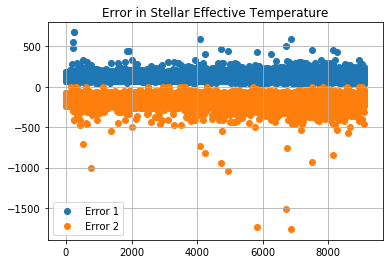

In [49]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_steff_err1"].values, label = "Error 1")
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_steff_err2"].values, label = "Error 2")
plt.title("Error in Stellar Effective Temperature")
plt.legend()
plt.grid()

### Positive Error

C:\Anaconda37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


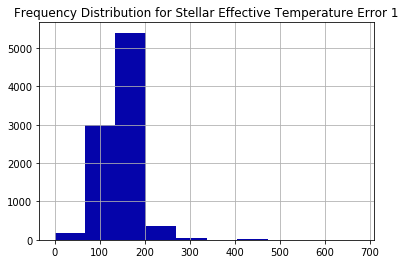

In [50]:
plt.hist(missing_error_values_df["koi_steff_err1"].values, color="#0504aa")
plt.title("Frequency Distribution for Stellar Effective Temperature Error 1")
plt.grid()

In [51]:
df["koi_steff_err1"].fillna(np.nanpercentile(missing_error_values_df["koi_steff_err1"].values, 50), inplace = True)

### Negative Error

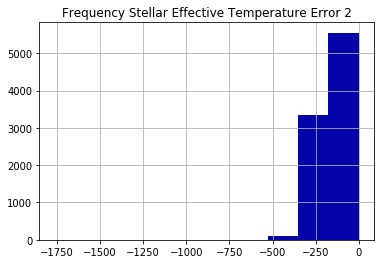

In [52]:
plt.hist(missing_error_values_df["koi_steff_err2"].values, color="#0504aa")
plt.title("Frequency Stellar Effective Temperature Error 2")
plt.grid()

In [53]:
df["koi_steff_err2"].fillna(np.nanpercentile(missing_error_values_df["koi_steff_err2"].values, 50), inplace = True)

## Replacing NaN in Surface Gravity

### Viewing Frequency Distribution

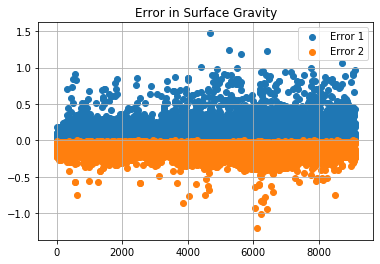

In [54]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_slogg_err1"].values, label = "Error 1")
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_slogg_err2"].values, label = "Error 2")
plt.title("Error in Surface Gravity")
plt.legend()
plt.grid()

#### Positive Error

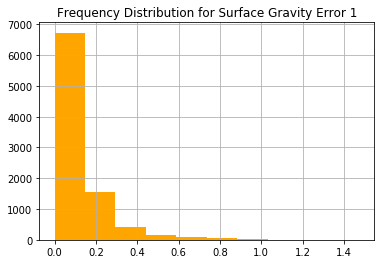

In [55]:
plt.hist(missing_error_values_df["koi_slogg_err1"].values, color="orange")
plt.title("Frequency Distribution for Surface Gravity Error 1")
plt.grid()

In [56]:
df["koi_slogg_err1"].fillna(np.nanpercentile(missing_error_values_df["koi_slogg_err1"].values, 50), inplace = True)

#### Negative Error

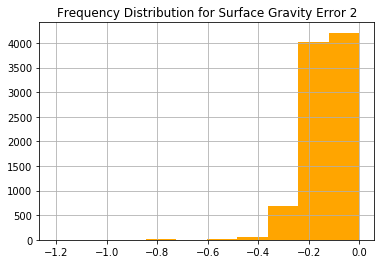

In [57]:
plt.hist(missing_error_values_df["koi_slogg_err2"].values, color = "orange")
plt.title("Frequency Distribution for Surface Gravity Error 2")
plt.grid()

In [58]:
df["koi_slogg_err2"].fillna(np.nanpercentile(missing_error_values_df["koi_slogg_err2"].values, 50), inplace = True)

## Replacing NaN in Stellar Radius

### Viewing Frequency Distribution

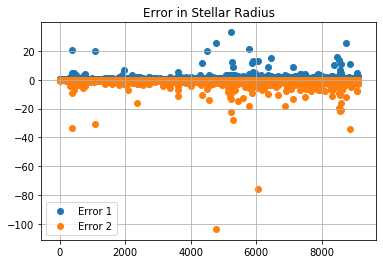

In [59]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_srad_err1"].values, label = "Error 1")
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_srad_err2"].values, label = "Error 2")
plt.title("Error in Stellar Radius")
plt.legend()
plt.grid()

#### Positive Error

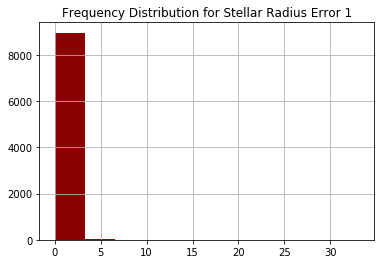

In [60]:
plt.hist(missing_error_values_df["koi_srad_err1"].values, color="darkred")
plt.title("Frequency Distribution for Stellar Radius Error 1")
plt.grid()

In [61]:
df["koi_srad_err1"].fillna(np.nanpercentile(missing_error_values_df["koi_srad_err1"].values, 50), inplace = True)

#### Negative Error

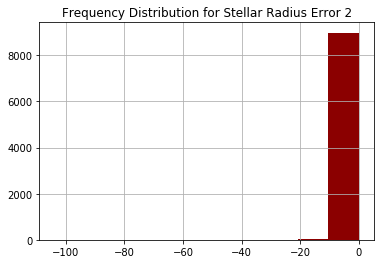

In [62]:
plt.hist(missing_error_values_df["koi_srad_err2"].values, color="darkred")
plt.title("Frequency Distribution for Stellar Radius Error 2")
plt.grid()

In [63]:
df["koi_srad_err2"].fillna(np.nanpercentile(missing_error_values_df["koi_srad_err2"].values, 50), inplace = True)

## Finding Errors in Non-Error Attributes

In [64]:
nan_columns = df.isnull().sum()
nan_columns = {col:count for col, count in nan_columns.items() if count >0}
pp.pprint(nan_columns)

{  'koi_kepmag': 1,
   'koi_score': 1206,
   'koi_tce_delivname': 255,
   'koi_tce_plnt_num': 255}


## Replacing NaN in Transit Depth

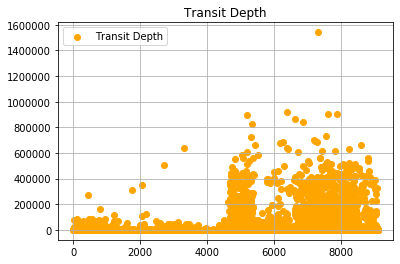

In [65]:
plt.scatter(range(df.shape[0]), df["koi_depth"].values, label = "Transit Depth", color ="orange")
plt.title("Transit Depth")
plt.legend()
plt.grid()

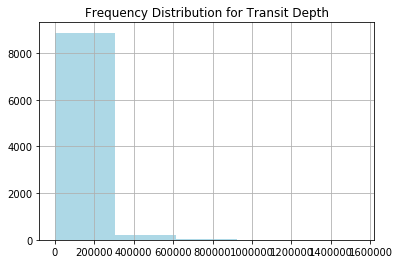

In [66]:
plt.hist(df["koi_depth"].values, bins=5, color="lightblue")
plt.title("Frequency Distribution for Transit Depth")
plt.grid()

In [67]:
df["koi_depth"].fillna(np.nanpercentile(df["koi_depth"].values, 50), inplace = True)

## Replacing NaN in Impact Parameter

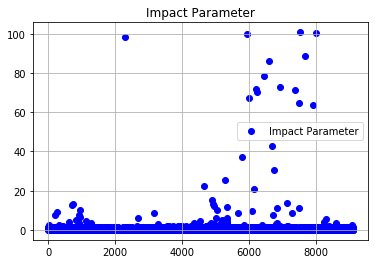

In [68]:
plt.scatter(range(df.shape[0]), df["koi_impact"].values, label = "Impact Parameter", color="blue")
plt.title("Impact Parameter")
plt.legend()
plt.grid()

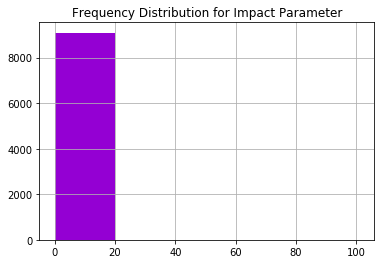

In [69]:
plt.hist(df["koi_impact"].values, bins=5, color="darkviolet")
plt.title("Frequency Distribution for Impact Parameter")
plt.grid()

In [70]:
df["koi_impact"].fillna(np.nanpercentile(df["koi_impact"].values, 50), inplace = True)

## Replacing NaN in Insolation Flux

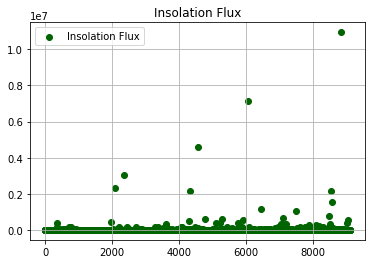

In [71]:
plt.scatter(range(df.shape[0]), df["koi_insol"].values, label = "Insolation Flux", color="darkgreen")
plt.title("Insolation Flux")
plt.legend()
plt.grid()

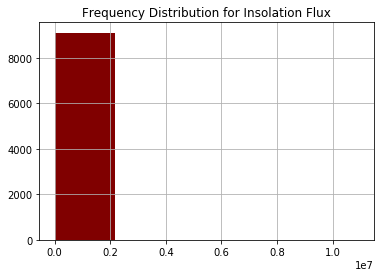

In [72]:
plt.hist(df["koi_insol"].values, bins=5, color="maroon")
plt.title("Frequency Distribution for Insolation Flux")
plt.grid()

In [73]:
df["koi_insol"].fillna(np.nanpercentile(df["koi_insol"].values, 50), inplace = True)

## Replacing NaN in Kepler Band Magnitude

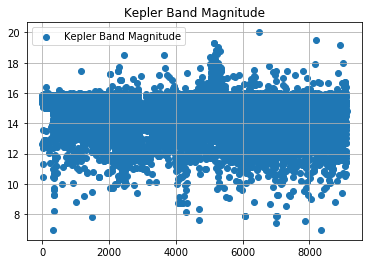

In [74]:
plt.scatter(range(df.shape[0]), df["koi_kepmag"].values, label = "Kepler Band Magnitude")
plt.title("Kepler Band Magnitude")
plt.legend()
plt.grid()

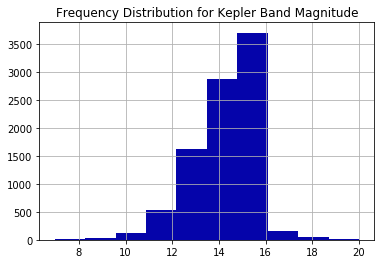

In [75]:
plt.hist(df["koi_kepmag"].values, color="#0504aa")
plt.title("Frequency Distribution for Kepler Band Magnitude")
plt.grid()

In [76]:
df["koi_kepmag"].fillna(np.nanpercentile(df["koi_kepmag"].values, 50), inplace = True)

## Replacing NaN in Transit Signal to Noise Ratio

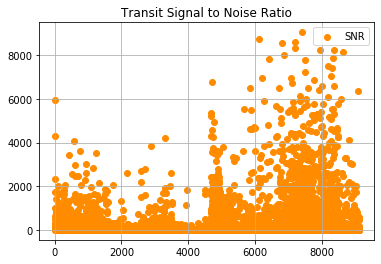

In [77]:
plt.scatter(range(df.shape[0]), df["koi_model_snr"].values, label = "SNR", color="darkorange")
plt.title("Transit Signal to Noise Ratio")
plt.legend()
plt.grid()

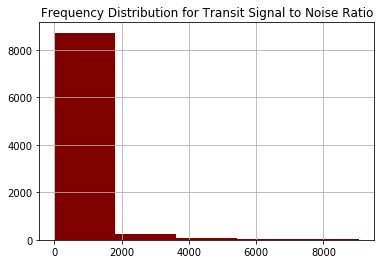

In [78]:
plt.hist(df["koi_model_snr"].values, bins=5, color="maroon")
plt.title("Frequency Distribution for Transit Signal to Noise Ratio")
plt.grid()

In [79]:
df["koi_model_snr"].fillna(np.nanpercentile(df["koi_model_snr"].values, 50), inplace = True)

## Replacing NaN in Planet Radius

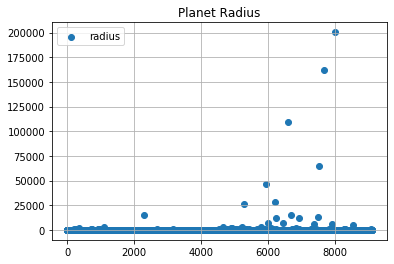

In [80]:
plt.scatter(range(df.shape[0]), df["koi_prad"].values, label = "radius")
plt.title("Planet Radius")
plt.legend()
plt.grid()

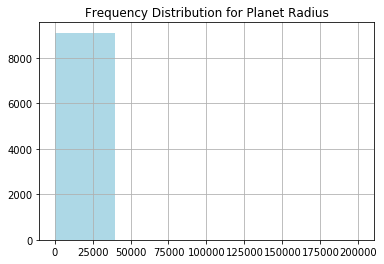

In [81]:
plt.hist(df["koi_prad"].values, bins=5, color="lightblue")
plt.title("Frequency Distribution for Planet Radius")
plt.grid()

In [82]:
df["koi_prad"].fillna(np.nanpercentile(df["koi_prad"].values, 50), inplace = True)

## Replacing NaN in Disposition Score

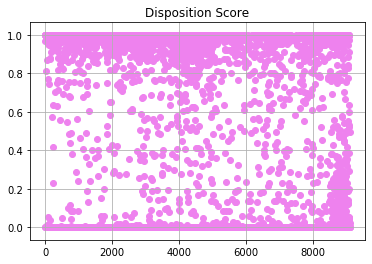

In [83]:
plt.scatter(range(df.shape[0]), df["koi_score"].values, label = "Score", color="violet")
plt.title("Disposition Score")
plt.grid()

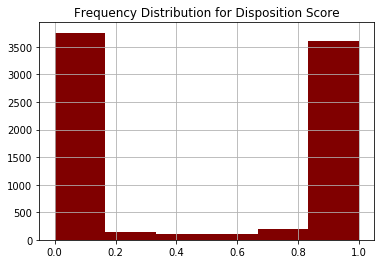

In [84]:
plt.hist(df["koi_score"].values, color="maroon", bins=6)
plt.title("Frequency Distribution for Disposition Score")
plt.grid()

In [85]:
df["koi_score"].fillna(np.nanpercentile(df["koi_score"].values, 50), inplace = True)

## Replacing NaN in Stellar Surface Gravity

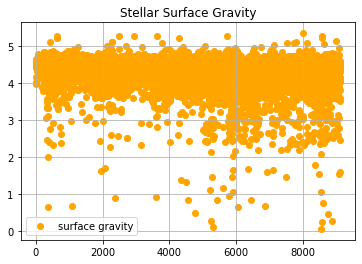

In [86]:
plt.scatter(range(df.shape[0]), df["koi_slogg"].values, label = "surface gravity", color="orange")
plt.title("Stellar Surface Gravity")
plt.legend()
plt.grid()

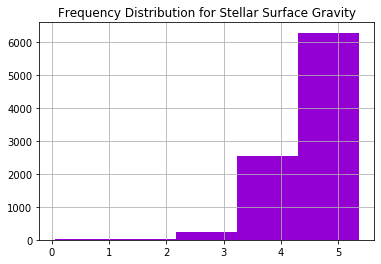

In [87]:
plt.hist(df["koi_slogg"].values, bins=5, color="darkviolet")
plt.title("Frequency Distribution for Stellar Surface Gravity")
plt.grid()

In [88]:
df["koi_slogg"].fillna(np.nanpercentile(df["koi_slogg"].values, 50), inplace = True)

## Replacing NaN in Stellar Radius

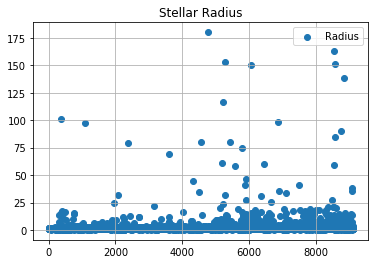

In [89]:
plt.scatter(range(df.shape[0]), df["koi_srad"].values, label = "Radius")
plt.title("Stellar Radius")
plt.legend()
plt.grid()

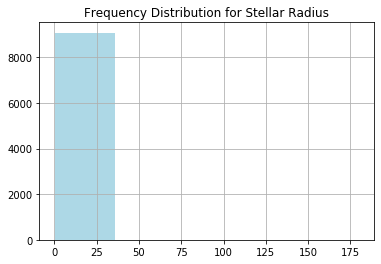

In [90]:
plt.hist(df["koi_srad"].values, color="lightblue", bins = 5)
plt.title("Frequency Distribution for Stellar Radius")
plt.grid()

In [91]:
df["koi_srad"].fillna(np.nanpercentile(df["koi_srad"].values, 50), inplace = True)

## Replacing NaN in Stellar Effective Temperature

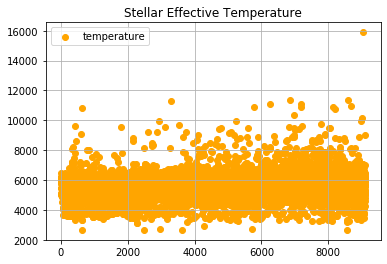

In [92]:
plt.scatter(range(df.shape[0]), df["koi_steff"].values, label = "temperature", color="orange")
plt.title("Stellar Effective Temperature")
plt.legend()
plt.grid()

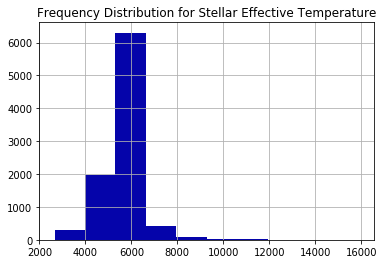

In [93]:
plt.hist(df["koi_steff"].values, color="#0504aa")
plt.title("Frequency Distribution for Stellar Effective Temperature")
plt.grid()

In [94]:
df["koi_steff"].fillna(np.nanpercentile(df["koi_steff"].values, 50), inplace = True)

## Replacing NaN in Equilibrium Temperature

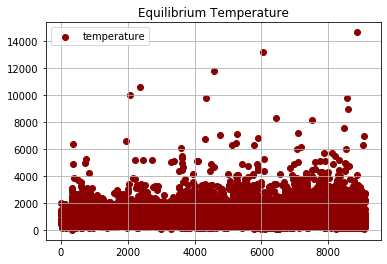

In [95]:
plt.scatter(range(df.shape[0]), df["koi_teq"].values, label = "temperature", color="darkred")
plt.title("Equilibrium Temperature")
plt.legend()
plt.grid()

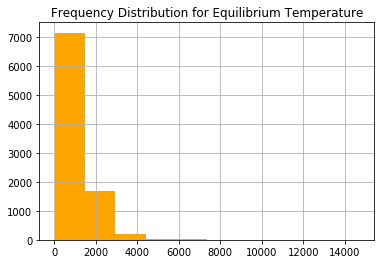

In [96]:
plt.hist(df["koi_teq"].values, color="orange")
plt.title("Frequency Distribution for Equilibrium Temperature")
plt.grid()

In [97]:
df["koi_teq"].fillna(np.nanpercentile(df["koi_teq"].values, 50), inplace = True)

# Re-Counting NaNs

In [98]:
nan_columns = df.isnull().sum()
nan_columns = {col:count for col, count in nan_columns.items() if count >0}
pp.pprint(nan_columns)

{'koi_tce_delivname': 255, 'koi_tce_plnt_num': 255}


# Saving Cleaned Dataset

In [99]:
#df.to_csv("../data/[CLEANED]kepler-data.csv")